In [45]:
import pandas as pd
import json
import sklearn.svm as svm
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## Change the name to get your path
user = 'Hans'

file1 = 'AG01-01.csv'
file1a = 'GTH01-01.csv'
file1b = 'GTL01-02.csv'

file2 = 'AG04-01.csv'
file2a = 'GTW04-01.csv'
file2b = 'GTA04-02.csv'

file3 = 'AG13-01.csv'
file3a = 'GTW13-01.csv'

file4 = 'AG14-01.csv'
file4a = 'GTE14-02.csv'

In [4]:
def load_Data(user, filename):
   data = json.load(open('dir.json'))
   dir = data[user] + filename
   return dir

In [54]:
data1 = pd.read_csv(load_Data(user, file1), header=0)
data1['start.time'] = pd.to_datetime(data1['start.time'])
observedData1 = data1[(data1['start.time'] >= '2017-10-03 18:45:15') & (data1['start.time'] <= '2017-10-03 20:47:15')]
observedData1['index'] = range(len(observedData1))
gt1a = pd.read_csv(load_Data(user, file1a), header=0)
gt1a['index'] = gt1a['time']
observedData1 = pd.merge(observedData1,gt1a[['index','coding']])

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [55]:
observedData2 = data1[(data1['start.time'] >= '2017-10-06 16:44:06') & (data1['start.time'] <= '2017-10-06 18:45:06')]
observedData2['index'] = range(len(observedData2))
gt1b = pd.read_csv(load_Data(user, file1b), header=0)
gt1b['index'] = gt1b['time']
observedData2 = pd.merge(observedData1,gt1b[['index','coding']])

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
data2 = pd.read_csv(load_Data(user, file2), header=0)
data2['start.time'] = pd.to_datetime(data2['start.time'])
observedData3 = data2[(data2['start.time'] >= '2017-09-12 12:02:56') & (data2['start.time'] <= '2017-09-12 14:03:56')]
observedData3['index'] = range(len(observedData3))
gt2a = pd.read_csv(load_Data(user, file2a), header=0)
gt2a['index'] = gt2a['time']
observedData3 = pd.merge(observedData3,gt2a[['index','coding']])

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
observedData4 = data2[(data2['start.time'] >= '2017-09-17 14:15:51') & (data1['start.time'] <= '2017-09-17 16:15:51')]
observedData4['index'] = range(len(observedData4))
gt2b = pd.read_csv(load_Data(user, file2b), header=0)
gt2b['index'] = gt2b['time']
observedData4 = pd.merge(observedData4,gt2b[['index','coding']])

In [58]:
data3 = pd.read_csv(load_Data(user, file3), header=0)
data3['start.time'] = pd.to_datetime(data3['start.time'])
observedData5 = data3[(data3['start.time'] >= '2017-09-20 10:36:44') & (data3['start.time'] <= '2017-09-20 12:37:44')]
observedData5['index'] = range(len(observedData5))
gt3a = pd.read_csv(load_Data(user, file3a), header=0)
gt3a['index'] = gt3a['time']
observedData5 = pd.merge(observedData5,gt3a[['index','coding']])

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [59]:
data4 = pd.read_csv(load_Data(user, file4), header=0)
data4['start.time'] = pd.to_datetime(data4['start.time'])
observedData6 = data4[(data4['start.time'] >= '2017-09-23 09:12:59') & (data4['start.time'] <= '2017-09-23 11:12:59')]
observedData6['index'] = range(len(observedData6))
gt4a = pd.read_csv(load_Data(user, file4a), header=0)
gt4a['index'] = gt4a['time']
observedData6 = pd.merge(observedData6,gt4a[['index','coding']])

C:\Users\Hans\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [60]:
observedData = pd.concat([observedData1,observedData2])
observedData = pd.concat([observedData,observedData3])
observedData = pd.concat([observedData,observedData4])
observedData = pd.concat([observedData,observedData5])
observedData = pd.concat([observedData,observedData6])

In [61]:
# observedData = pd.merge(observedData,gt[['index','coding']])
## shuffle the data (for training and testing)
observedData = observedData.sample(frac = 1)

n = int(0.75 * len(observedData))

train = observedData[:n]
test = observedData[n:]
## this might be an issue since there is ordinality and that makes things weird.  The later parts of this trial
## were more likely to be sedentary.
trainX = train[['mean.vm','sd.vm','mean.ang','sd.ang','p625','dfreq','ratio.df']]
trainY = train['coding']
testX = test[['mean.vm','sd.vm','mean.ang','sd.ang','p625','dfreq','ratio.df']]
testY = test['coding']

In [62]:
clf = svm.SVC(cache_size=7000)
clf.fit(trainX, trainY)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
## get accuracy of the svm
clf.score(testX,testY)

0.7514829461196243

In [75]:
## what if we tried a neural net for fun?
from sklearn.neural_network import MLPClassifier
n_net = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000,500,200,100), random_state=1)
n_net.fit(trainX,trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2000, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [76]:
## test accuracy of neural net
np.sum(n_net.predict(testX) == testY) / len(testX)

0.72207695181172959

In [64]:
## a KNN approach
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=100,weights = 'uniform')
neigh2 = KNeighborsClassifier(n_neighbors=1000,weights = 'distance')
neigh1.fit(trainX, trainY)
neigh2.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
           weights='distance')

In [65]:
neigh1.score(testX,testY),neigh2.score(testX,testY)

(0.74616905585763715, 0.77792881858625806)

In [31]:
predictedVals = neigh2.predict(testX)
confusion_matrix(testY,predictedVals,labels = ['sedentary','non-sedentary'])

array([[3451,  591],
       [ 997, 2992]], dtype=int64)

In [51]:
# np.array(testY)
# f1_score(np.array(testY),np.array(predictedVals),labels = ['sedentary','non-sedentary'])

In [52]:
acc = []
for i in range(50,1000,100):
    neigh = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
    neigh.fit(trainX,trainY)
    acc.append([i,neigh.score(testX,testY)])
acc = np.array(acc)

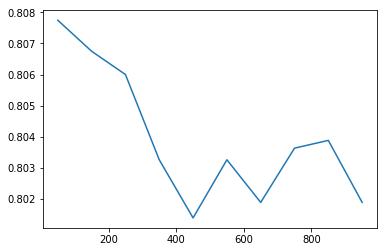

In [53]:
acc = np.array(acc)
plt.plot(acc[:,0],acc[:,1])